### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 7
### Due: Friday, Oct 20 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw7_data.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import optimize

data = np.load('hw7_data.npy')
voltage, sigma = data[:,0], data[:,1]

# 1.1 Compute the sample mean and standard error

In [43]:
mean = np.mean(voltage)
error = np.std(voltage, ddof=1) / np.sqrt(len(voltage))

print("The meanfor the sample is:", mean, "\nand the standard error is:", error)

The meanfor the sample is: 5.106 
and the standard error is: 0.32838053806183115


# 1.2 Fit the ln_likelihood function and the best-fit mean voltage

In [44]:
ln_likelihood = lambda mu: np.sum(((voltage - mu) / sigma) ** 2)
output = optimize.minimize(ln_likelihood, x0=mean)

voltage_best_fit = output.x[0]

print("The best-fit for the mean of the voltage is", voltage_best_fit)

The best-fit for the mean of the voltage is 4.942118218777643


# 1.3 Plot the Bayesian normalized posterior probability density for the mean voltage

Text(0.5, 1.0, 'Normalized Bayesian Posterior Probability Density for the Mean Voltage')

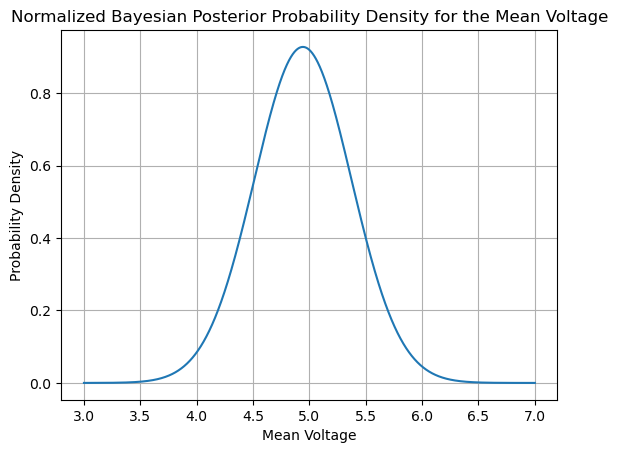

In [53]:
# Prior
mu = np.linspace(3,7,10000)
prior = np.ones_like(mu) / np.trapz(np.ones_like(mu), dx=(7 - 3) / 1000)

# Likelihood
likelihood = np.prod(norm.pdf(voltage, mu[:, np.newaxis], sigma), axis = 1)

# Posterior
posterior = likelihood * prior
normalized_posterior = posterior / np.trapz(posterior, dx=(7-3)/10000)

# Plot
plt.figure()
plt.plot(mu, normalized_posterior, label='Mean')
plt.xlabel('Mean Voltage')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.title('Normalized Bayesian Posterior Probability Density for the Mean Voltage')


# 1.4 Find the equal-tailed 68.3% credible region for the mean. Find the MAP

In [58]:
cdf = np.cumsum(normalized_posterior) / np.sum(normalized_posterior)

lower_index = np.argmin(np.abs(cdf - (1-0.683)/2))
upper_index = np.argmin(np.abs(cdf - (1+0.683)/2))

lower_boundary = mu[lower_index]
upper_boundary = mu[upper_index]

MAP_value = mu[np.argmax(normalized_posterior)]

print(f"For the 68.3% credible region, the boundaries are:\n Lower boundary: {lower_boundary}\n Upper boundary: {upper_boundary}")
print(f"\nSample mean: {mean}")
print(f"  +/- error: {mean - error}, {mean + error}")
print(f"\nThe Mean Average Precision value is: {MAP_value}")

For the 68.3% credible region, the boundaries are:
 Lower boundary: 4.511351135113511
 Upper boundary: 5.372637263726373

Sample mean: 5.106
  +/- error: 4.777619461938169, 5.434380538061831

The Mean Average Precision value is: 4.942194219421943


# 1.5 Repeat 3 & 4 with a uniform prior mean with a range of [4.6, 5.4]

Text(0.5, 1.0, 'Normalized Bayesian Posterior Probability Density for the Mean Voltage')

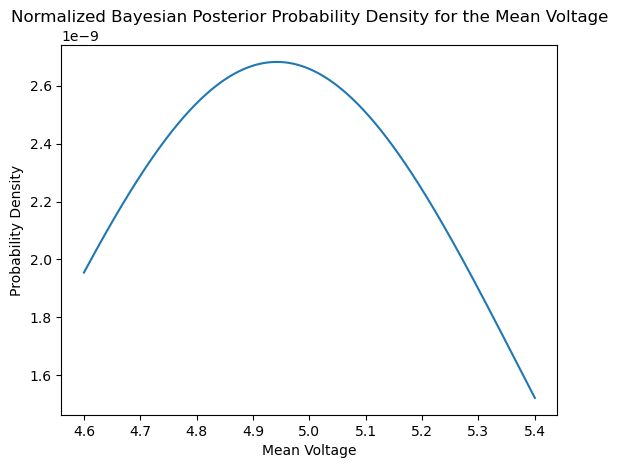

In [61]:
prior_mu_46_54 = np.linspace(4.6, 5.4, 10000)

mu_46_54 = np.linspace(4.6, 5.4, 10000)

likelihood_mu_46_54 = np.prod(norm.pdf(voltage, mu_46_54[:, np.newaxis], sigma), axis=1)

normalized_posterior_mu_46_54 = likelihood_mu_46_54 * prior

posterior_mu_46_54 = normalized_posterior_mu_46_54 / np.trapz(normalized_posterior_mu_46_54, dx=(5.4- 4.6)/10000)

plt.figure()
plt.plot(mu_46_54, normalized_posterior_mu_46_54,label='4.6, 5.4')
plt.xlabel('Mean Voltage')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Normalized Bayesian Posterior Probability Density for the Mean Voltage')